![tutorialpromo](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/tutorial_banner.PNG?raw=1)


# Tutorial 1 - Weather Data: Accesing it, understanding it, visualizing it!


This notebook explores a standard type of weather data, the typical meteorological year (TMY), and how to summarize it with Python and [Pandas](https://pandas.pydata.org/).

![Overview](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/tutorial_1_overview.PNG?raw=1)

## Steps:
- [Weather data in PV performance models](#Weather-Data-&-PV)
- Looking at a sample weather data file
- Where to get weather data from?
- Weather data to API

## PV Concepts:
- TMY
- GHI, DNI, DHI
- DryBulb, Wspd
- Irradiance vs. Insolation

## Python Concepts:
- Exploring a Pandas dataframe (`df`): `len()`, `df.head()`, `df.keys()`
- [pvlib input-output tools](https://pvlib-python.readthedocs.io/en/stable/api.html#io-tools)
- Ploting a Pandas dataframe (`df`): `df.plot()`
- Aggregating data in a dataframe (`df`): [`df.resample(freq).sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)
- Pandas [`DateOffsets`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) - shortcuts to set the frequency when resampling
- Getting NREL irradiance data from the web based API using pvlib

## Weather Data & PV

Weather and irradiance data are used as input to PV performance models.  


![SRRL](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/tutorial_1_SRRL.PNG?raw=1)



These data are directly measured, derived from measured data, or simulated using a stochastic model.






### Typical Meteorological Year

TMY datasets are intended to represent the weather for a typical year at a given location.

TMY datasets provide hourly **solar irradiance**, **air temperature**, **wind speed**, and other weather measurements for a hypothetical year that represents more or less a "median year" for solar resource.  


![TMY3 screenshot](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/tutorial_1_tmy3_example.PNG?raw=1)

TMY datasets are created by selecting individual months out of an extended period of weather measurememts (say, 20 years of data) to construct a single year's worth of data. There are several methods for selecting which months to include, but the general idea is to calculate monthly summary statistics and take the month that lies in the middle of the distribution.  For example, no two Januaries will be exactly the same, so summing the total solar irradiance for each January will give a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), and the month that falls closest to the [median](https://en.wikipedia.org/wiki/Median) is chosen as the representative month. The same process is followed for February, March, and so on, and all twelve representative months are stitched together into a year-long dataset.  

The oldest TMYs were calculated using data from the nearest weather station (airports and such). Today, it's common to use TMYs calculated using simulated weather data from satellite imagery because of the improved spatial resolution.

To get a better feel for TMY data, we'll first explore an example TMY dataset that is bundled with pvlib.

### Irradiance

Irradiance is an instantaneous measurement of solar power over some area.  For practical purposes of measurement and interpretation, irradiance is expressed and separated into different components.

![overview irradiance](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/tutorial_1_DNIDHIGHI.PNG?raw=1)

The units of irradiance are watts per square meter.  

GHI, DHI, and DNI are the three "basic" ways of measuring irradiance, although each of them is measured in units of power per area (watts per square meter):

- GHI: Global Horizontal Irradiance; the total sunlight intensity falling on a horizontal plane
- DHI: Diffuse Horizontal Irradiance; the subset of sunlight falling on a horizontal plane that isn't coming directly from the sun (e.g., the light that makes the sky blue)
- DNI: Direct Normal Irradiance; the subset of sunlight coming directly from the sun

![Overview](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/t1_GHI.PNG?raw=1)



![Overview](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/t1_DHI.PNG?raw=1)



![Overview](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/t1_DNI.PNG?raw=1)


### Wind

Wind speed is measured with an anemometer.  The most common type is a the cup-type anemometer, shown on the right side of the picture below.  The number of rotations per time interval is used to calculate the wind speed.  The vane on the left is used to measure the direction of the wind.  Wind direction is reported as the direction from which the wind is blowing.

<img src="https://pvpmc.sandia.gov/app/uploads/sites/243/2022/11/anemometer.jpg"></img>

### Air temperature

Also known as dry-bulb temperature, is the temperature of the ambient air when the measurement device is shielded from radiation and moisture. The most common method of air temperature measurement uses a resistive temperature device (RTD) or thermocouple within a radiation shield. The shield blocks sunlight from reaching the sensor (avoiding radiative heating), yet allows natural air flow around the sensor. More accurate temperature measurement devices utilize a shield which forces air across the sensor.

Air temperature is typically measured on the Celsius scale.

Air temperature plays a large role in PV system performance as PV modules and inverters are cooled convectively by the surrounding air.

<img src="https://www.sandia.gov/app/uploads/sites/243/2022/11/AmbTemp-768x1024-1.jpg" width="400" height="400"> </img>


## Where to get _Free_ Solar Irradiance Data?

There are many different sources of solar irradiance data. For your projects, these are some of the most common:

- [NSRDB](https://maps.nrel.gov/nsrdb-viewer/) - National Solar Radiation Database. You can access data through the website for many locations accross the world, or you can use their [web API](https://developer.nrel.gov/docs/solar/nsrdb/) to download data programmatically. An "API" is an ["application programming interface"](https://en.wikipedia.org/wiki/API), and a "web API" is a programming interface that allows you to write code to interact with web services like the NSRDB.

- [EPW](https://www.energy.gov/eere/buildings/downloads/energyplus-0) - Energy Plus Weather data is available for many locations accross the world. It's in its own format file ('EPW') so you can't open it easily in a spreadsheet program like Excel, but you can use [`pvlib.iotools.read_epw()`](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.read_epw.html) to get it into a dataframe and use it.

- [PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/en/) - Free global weather data provided by the European Union and derived from many govermental agencies including the NSRDB. PVGIS also provides a web API. You can get PVGIS TMY data using [`pvlib.iotools.get_pvgis_tmy()`](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html).

- Perhaps another useful link: https://sam.nrel.gov/weather-data.html

## Where else can you get historical irradiance data?

There are several commercial providers of solar irradiance data. Data is available at different spatial and time resolutions. Each provider offers data under subscription that will provide access to irradiance (and other weather variables) via API to leverage in python.

* [SolarAnywhere](https://www.solaranywhere.com/)
* [SolarGIS](https://solargis.com/)
* [Vaisala](https://www.vaisala.com/en)
* [Meteonorm](https://meteonorm.com/en/)
* [DNV Solar Resource Compass](https://src.dnv.com/)


![NSRDB Example](https://github.com/PV-Tutorials/2025_pvlib_UNM/blob/main/images/tutorial_1_NSRDB_example.PNG?raw=1)


## NREL API Key
At the [NREL Developer Network](https://developer.nrel.gov/), there are [APIs](https://en.wikipedia.org/wiki/API) to a lot of valuable [solar resources](https://developer.nrel.gov/docs/solar/) like [weather data from the NSRDB](https://developer.nrel.gov/docs/solar/nsrdb/), [operational data from PVDAQ](https://developer.nrel.gov/docs/solar/pvdaq-v3/), or indicative calculations using [PVWatts](https://developer.nrel.gov/docs/solar/pvwatts/). In order to use these resources from NREL, you need to [register for a free API key](https://developer.nrel.gov/signup/). You can test out the APIs using the `DEMO_KEY` but it has limited bandwidth compared to the [usage limit for registered users](https://developer.nrel.gov/docs/rate-limits/). NREL has some [API usage instructions](https://developer.nrel.gov/docs/api-key/), but pvlib has a few builtin functions, like [`pvlib.iotools.get_psm3()`](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_psm3.html), that wrap the NREL API, and call them for you to make it much easier to use.

### Application Programming Interface (API)
What exactly is an API? Nowadays, the phrase is used interchangeably with a "web API" but in general an API is just a recipe for how to interface with a application programmatically, _IE_: in code. An API could be as simple as a function signature or its published documentation, _EG_: the API for the `solarposition` function is you give it an ISO8601 formatted date with a timezone, the latitude, longitude, and elevation as numbers, and it returns the zenith and azimuth as numbers.

A web API is the same, except the application is a web service, that you access at its URL using web methods. We won't go into too much more detail here, but the most common web method is `GET` which is pretty self explanatory. Look over the [NREL web usage instructions](https://developer.nrel.gov/docs/api-key/) for some examples, but interacting with a web API can be as easy as entering a URL into a browser. Try the URL below to _get_ the PVWatts energy output for a fixed tilt site in [Broomfield, CO](https://goo.gl/maps/awkEcNGzSur9Has18).

https://developer.nrel.gov/api/pvwatts/v6.json?api_key=DEMO_KEY&lat=40&lon=-105&system_capacity=4&azimuth=180&tilt=40&array_type=1&module_type=1&losses=10

In addition to just using your browser, you can also access web APIs programmatically. The most popular Python package to interact with web APIs is [requests](https://docs.python-requests.org/en/master/). There's also free open source command-line tools like [cURL](https://curl.se/) and [HTTPie](https://httpie.io/), and a popular nagware/freemium GUI application called [Postman](https://www.postman.com/).



## Now to Coding:


### 0. First Step for Google Collab:

If running on google colab, uncomment (remove the # sign) from the next cell and execute it to install the dependencies and prevent "ModuleNotFoundError" in later cells.


In [ ]:
# !pip install -r https://raw.githubusercontent.com/PV-Tutorials/2024_PVSC/main/requirements.txt

### 1. Import Libraries

In Python, some functions are builtin like `print()` but others must be imported before they can be used. For this notebook we're going to import three packages:
* [pvlib](https://pvlib-python.readthedocs.io/en/stable/) - library for simulating performance of photovoltaic energy systems.
* [pandas](https://pandas.pydata.org/) - analysis tool for timeseries and tabular data
* [matplotlib](https://matplotlib.org/) - data visualization for Python

Some Python modules are part of the [standard library](https://docs.python.org/3/library/index.html), but are not imported with builtins.

In [ ]:
import os  # for getting environment variables
import pathlib  # for finding the example dataset
import pvlib
import pandas as pd  # for data wrangling
import matplotlib.pyplot as plt  # for visualization

Query which version you are using of pvlib:

In [ ]:
print(pvlib.__version__)

0.11.2


### 2. Fetching TMYs from the NSRDB

The NSRDB, one of many sources of weather data intended for PV modeling, is free and easy to access using pvlib. As an example, we'll fetch a TMY dataset for Albuquerque, New Mexico Rico at coordinates [(35.06995837964615, -106.63433040356928)](https://maps.app.goo.gl/3GnTC9i8WGxDbXeh7). We use [`pvlib.iotools.get_psm3()`](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_psm3.html) which returns a Python dictionary of metadata and a Pandas dataframe of the timeseries weather data.

**Please pause now to visit https://developer.nrel.gov/signup/ and get an API key.**


**If you have an NREL API key please enter it in the next cell.**

In [2]:
NREL_API_KEY = "7DVW5VF1J69dY5qqNLrWvEktOYUrZdWVly0hzodk"  # <-- please set your NREL API key here

# note you must use "quotes" around your key, for example:
# NREL_API_KEY = 'DEMO_KEY'  # single or double both work fine

# during the live tutorial, we've stored a dedicated key on our server
if NREL_API_KEY is None:
    try:
        NREL_API_KEY = os.environ['NREL_API_KEY']  # get dedicated key for tutorial from servier
    except KeyError:
        NREL_API_KEY = 'DEMO_KEY'  # OK for this demo, but better to get your own key

In [ ]:
df_tmy, metadata = pvlib.iotools.get_psm3(
    latitude=18.4671, longitude=-66.1185,
    api_key=NREL_API_KEY,
    email='bwebster1@unm.edu',  # <-- any email works here fine
    names='2021')
metadata

{'Source': 'NSRDB',
 'Location ID': '1493238',
 'City': '-',
 'State': '-',
 'Country': '-',
 'Time Zone': -4,
 'Local Time Zone': -4,
 'Clearsky DHI Units': 'w/m2',
 'Clearsky DNI Units': 'w/m2',
 'Clearsky GHI Units': 'w/m2',
 'Dew Point Units': 'c',
 'DHI Units': 'w/m2',
 'DNI Units': 'w/m2',
 'GHI Units': 'w/m2',
 'Solar Zenith Angle Units': 'Degree',
 'Temperature Units': 'c',
 'Pressure Units': 'mbar',
 'Relative Humidity Units': '%',
 'Precipitable Water Units': 'cm',
 'Wind Direction Units': 'Degrees',
 'Wind Speed Units': 'm/s',
 'Cloud Type -15': 'N/A',
 'Cloud Type 0': 'Clear',
 'Cloud Type 1': 'Probably Clear',
 'Cloud Type 2': 'Fog',
 'Cloud Type 3': 'Water',
 'Cloud Type 4': 'Super-Cooled Water',
 'Cloud Type 5': 'Mixed',
 'Cloud Type 6': 'Opaque Ice',
 'Cloud Type 7': 'Cirrus',
 'Cloud Type 8': 'Overlapping',
 'Cloud Type 9': 'Overshooting',
 'Cloud Type 10': 'Unknown',
 'Cloud Type 11': 'Dust',
 'Cloud Type 12': 'Smoke',
 'Fill Flag 0': 'N/A',
 'Fill Flag 1': 'Missing I

What if we want a specific year, can NSRDB API provide it?
Identify the answer with the cell below:

In [ ]:
help(pvlib.iotools.get_psm3)

Help on function get_psm3 in module pvlib.iotools.psm3:

get_psm3(latitude, longitude, api_key, email, names='tmy', interval=60, attributes=('air_temperature', 'dew_point', 'dhi', 'dni', 'ghi', 'surface_albedo', 'surface_pressure', 'wind_direction', 'wind_speed'), leap_day=True, full_name='pvlib python', affiliation='pvlib python', map_variables=True, url=None, timeout=30)
    Retrieve NSRDB PSM3 timeseries weather data from the PSM3 API. The NSRDB
    is described in [1]_ and the PSM3 API is described in [2]_, [3]_, and [4]_.

    .. versionchanged:: 0.9.0
       The function now returns a tuple where the first element is a dataframe
       and the second element is a dictionary containing metadata. Previous
       versions of this function had the return values switched.

    .. versionchanged:: 0.10.0
       The default endpoint for hourly single-year datasets is now v3.2.2.
       The previous datasets can still be accessed (for now) by setting
       the ``url`` parameter to the o

### 4. Explore your weatherfile

Let's display the first 4 lines of the dataframe

In [ ]:
df_tmy.head(4)

,Year,Month,Day,Hour,Minute,temp_air,temp_dew,dhi,dni,ghi,albedo,pressure,wind_direction,wind_speed
2021-01-01 00:30:00-04:00,2021,1,1,0,30,25.6,20.0,0.0,0.0,0.0,0.08,1030.0,75.0,6.1
2021-01-01 01:30:00-04:00,2021,1,1,1,30,25.5,19.8,0.0,0.0,0.0,0.08,1030.0,76.0,6.0
2021-01-01 02:30:00-04:00,2021,1,1,2,30,25.4,19.7,0.0,0.0,0.0,0.08,1029.0,77.0,5.8
2021-01-01 03:30:00-04:00,2021,1,1,3,30,25.4,19.8,0.0,0.0,0.0,0.08,1029.0,77.0,5.7


This dataset follows the standard format of handling timeseries data with pandas -- one row per timestamp, one column per measurement type.  Because TMY files represent one year of data (no leap years), that means they'll have 8760 rows.  The number of columns can vary depending on the source of the data.

In [ ]:
print("Number of rows:", len(df_tmy))
print("Number of columns:", len(df_tmy.columns))

Number of rows: 8760
Number of columns: 14


You can access single rows by pointing to its number location (iloc) or by using the index name it has. In this case, that is a dateTime


In [ ]:
df_tmy.iloc[0];

In [ ]:
df_tmy.loc['2021-01-01 01:30:00-04:00'];

You can also print all the column names in the dataframe

In [ ]:
df_tmy.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'temp_air', 'temp_dew', 'dhi',
       'dni', 'ghi', 'albedo', 'pressure', 'wind_direction', 'wind_speed'],
      dtype='object')

There are 71 columns, which is quite a lot!  For now, let's focus just on the ones that are most important for PV modeling -- the irradiance, temperature, and wind speed columns, and extract them into a new DataFrame.

### 5. Downselect columns

There are a lot more weather data in that file that you can access. To investigate all the column headers, we used `.keys()` above. Always read the [Instruction Manual](https://www.nrel.gov/docs/fy08osti/43156.pdf) for the weather files to get more details on how the data is aggregated, units, etc.

At this point we are interested in <b> GHI, DHI, DNI, DryBulb </b> and <b> Wind Speed </b>. For this NREL TMY3 dataset the units of irradiance are W/m&sup2;, dry bulb temperature is in &deg;C, and wind speed is m/s.

In [ ]:
# GHI, DHI, DNI are irradiance measurements
# DryBulb is the "dry-bulb" (ambient) temperature
# Wspd is wind speed
df_tmy = df_tmy[['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed']]
# show the first 15 rows:
df_tmy.head(15)

,ghi,dhi,dni,temp_air,wind_speed
2021-01-01 00:30:00-04:00,0.0,0.0,0.0,25.6,6.1
2021-01-01 01:30:00-04:00,0.0,0.0,0.0,25.5,6.0
2021-01-01 02:30:00-04:00,0.0,0.0,0.0,25.4,5.8
2021-01-01 03:30:00-04:00,0.0,0.0,0.0,25.4,5.7
2021-01-01 04:30:00-04:00,0.0,0.0,0.0,25.3,5.5
2021-01-01 05:30:00-04:00,0.0,0.0,0.0,25.4,5.4
2021-01-01 06:30:00-04:00,0.0,0.0,0.0,25.7,5.5
2021-01-01 07:30:00-04:00,70.0,46.0,215.0,26.3,5.8
2021-01-01 08:30:00-04:00,262.0,85.0,553.0,26.9,6.4
2021-01-01 09:30:00-04:00,437.0,120.0,634.0,27.2,6.7


## Plotting time series data with pandas and matplotlib

Let's make some plots to get a better idea of what TMY data gives us.

### Irradiance

First, the three irradiance fields:

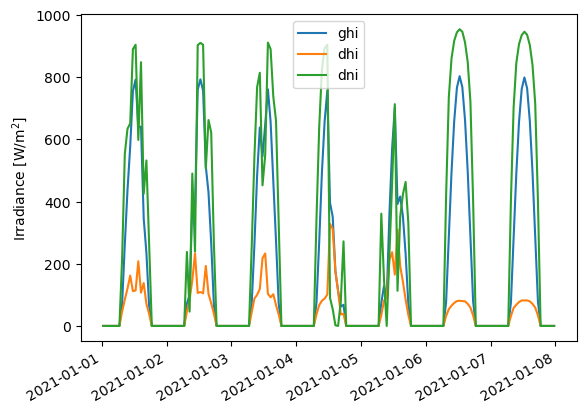

In [ ]:
first_week = df_tmy.head(24*7)  # Plotting 7 days, each one has 24 hours or entries
first_week[['ghi', 'dhi', 'dni']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

Let's control the parameters a bit more

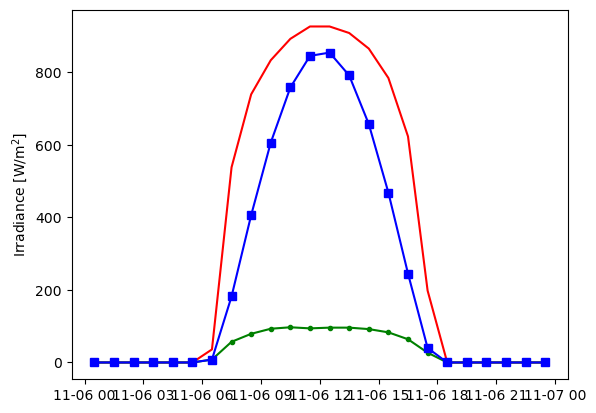

In [ ]:
birthday = df_tmy.loc['2021-11-06':'2021-11-06']
plt.plot(birthday['dni'], color='r')
plt.plot(birthday['dhi'], color='g', marker='.')
plt.plot(birthday['ghi'], color='b', marker='s')
plt.ylabel('Irradiance [W/m$^2$]');

#### Exercise

How does the Irradiance typically look like this week?

Hint: the next cell is 'Markdown', you need to switch it to 'Code' for it to run

classweek = df.loc[] # Type the conference week here, using the last code cell as example i.e. '1990-11-06':'1990-11-06'
plt.plot(classweek['DNI'], color='g')
plt.plot(classweek['DHI'], color='b', marker='.')
plt.plot(classweek['GHI'], color='r', marker='s')
plt.ylabel('Irradiance [W/m$^2$]');

Later tutorials will show how these three values are used in PV modeling.  For now, let's just get a qualitative understanding of the differences between them: looking at the above plot, there is a pattern where when DNI is high, DHI is low.  The sun puts out a (roughly) constant amount of energy, which means photons either make it through the atmosphere without scattering and are counted as direct irradiance, or they tend to get scattered and become part of the diffuse irradiance, but not both.  Looking at DNI makes it easy to pick out which hours are cloud and which are sunny -- most days in January are rather overcast with low irradiance, but the sun does occasionally break through.

#### Temperature

Next up is temperature:

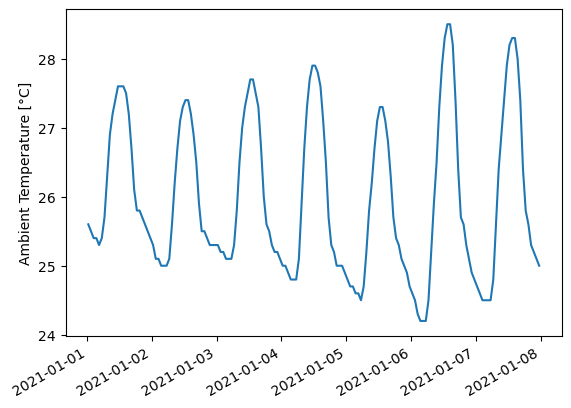

In [ ]:
first_week['temp_air'].plot()
plt.ylabel('Ambient Temperature [°C]');

#### Wind speed

And finally, wind speed:

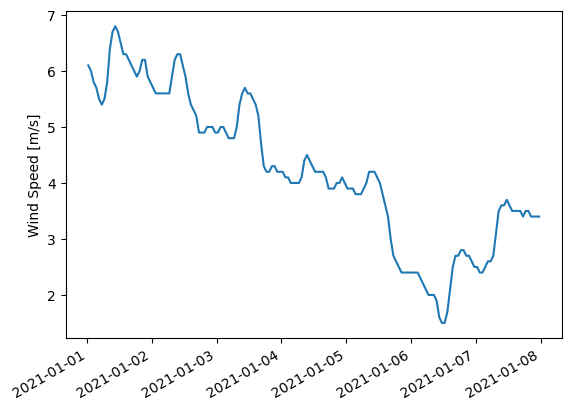

In [ ]:
first_week['wind_speed'].plot()
plt.ylabel('Wind Speed [m/s]');

## 3. Aggregating hourly data to monthly summaries

Pandas makes it easy to roll-up timeseries data into summary values. We can use the [`DataFrame.resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function with [`DateOffsets`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) like `'M'` for months.  For example, we can calculate total monthly GHI as a quick way to visualize the seasonality of solar resource:

In [ ]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df_tmy['ghi'].resample('M').sum()
monthly_ghi.head(4)

C:\Users\sayala\AppData\Local\Temp\1\ipykernel_23136\3896696835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ghi = df_tmy['ghi'].resample('M').sum()


2021-01-31 00:00:00-04:00    153522.0
2021-02-28 00:00:00-04:00    159212.0
2021-03-31 00:00:00-04:00    204065.0
2021-04-30 00:00:00-04:00    195086.0
Freq: ME, Name: ghi, dtype: float64

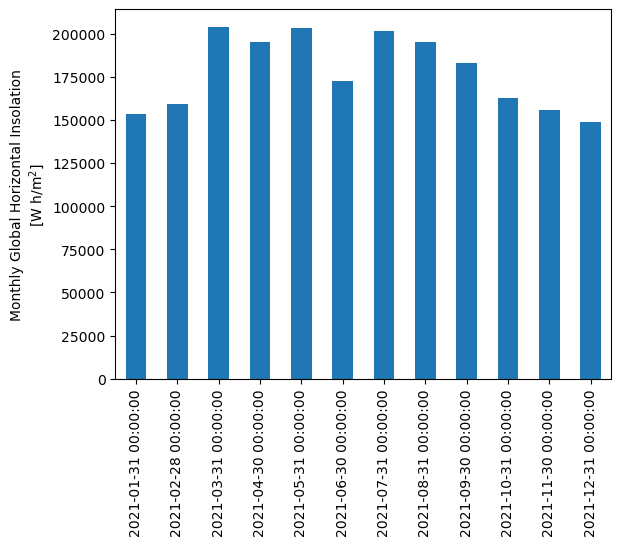

In [ ]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Insolation\n[W h/m$^2$]');

We can also take monthly averages instead of monthly sums:

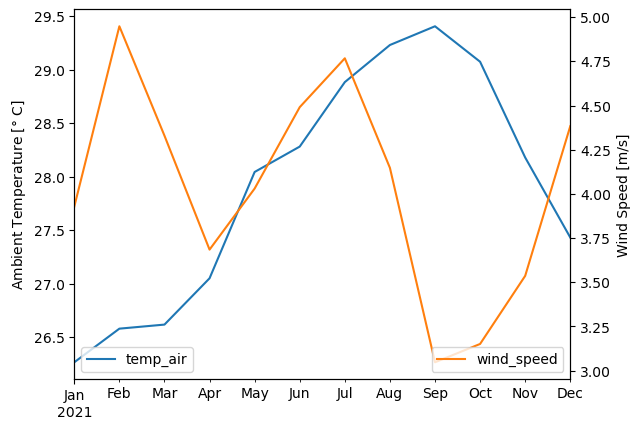

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df_tmy[['temp_air', 'wind_speed']].resample('ME').mean()
monthly_average_temp_wind['temp_air'].plot(ax=ax1, c='tab:blue')
monthly_average_temp_wind['wind_speed'].plot(ax=ax2, c='tab:orange')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right');

### Exercise

Plot the Average DNI per Day

In [ ]:
try:
    daily_average_DNI = df_tmy[['']].resample('').mean()  # Add the column name, and resample by day. Month is 'M', day is..
    daily_average_DNI.plot()
except:
    print("You haven't finished this exercise correctly, try again!")

You haven't finished this exercise correctly, try again!


[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).